In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
from dnn_utils import *
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import os

path, dirs, cat_files_train = next(os.walk("training_set/cats/"))
file_count_cat = len(cat_files_train)
print(file_count_cat)

path, dirs, dog_files_train = next(os.walk("training_set/dogs/"))
file_count_dog = len(dog_files_train)
print(file_count_dog)
    

4001
4001


In [4]:
n_cat = 200
n_dog = 200

#Variables
m = n_cat + n_dog               # Number of train ex.
print(m)
num_px = 64
label_y = np.zeros((1,m))
X_train = np.zeros((12288,m))
# Input Dataset from the folder

for i in range(m):
#     print(i%n_cat)
    if i<n_cat:
        my_image = "cat."+str(i+1)+".jpg" # change this to the name of your image file 
        fname = "training_set/cats/" + my_image
        image = np.array(ndimage.imread(fname, flatten=False))
        my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
        label_y[0][i] = 1 # the true class of your image (1 -> cat, 0 -> non-cat)
        X_train[:,i] = my_image[:,0]
        
    else:
        my_image = "dog."+str((i+1-n_cat))+".jpg" # change this to the name of your image file 
        fname = "training_set/dogs/" + my_image
        image = np.array(ndimage.imread(fname, flatten=False))
        my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
        label_y[0][i] = 0
        X_train[:,i] = my_image[:,0]
    

#     fname = "test_set/cats/" + my_image
#     image = np.array(ndimage.imread(fname, flatten=False))
#     my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
    # my_predicted_image = %precisiondict(my_image, my_label_y, parameters)
# print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + 
#        classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

# print(train_y[1:10])

400


In [5]:
print(m)
print(X_train.shape)
print(label_y.shape)

400
(12288, 400)
(1, 400)


In [6]:
train_x = X_train/255
# train_x = train_x.T
train_y = label_y

In [7]:
n_x = 12288     # num_px * num_px * 3
layers_dims = [12288,10,10,10,1]

In [8]:

def L_layer_model(X, Y, layers_dims, learning_rate = 0.001, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
#     print(parameters)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X,parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL,Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL,Y,caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters,grads,learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [9]:
train_x.shape

(12288, 400)

Cost after iteration 0: 0.698790
Cost after iteration 100: 0.686135
Cost after iteration 200: 0.680682
Cost after iteration 300: 0.675614
Cost after iteration 400: 0.670597
Cost after iteration 500: 0.665456
Cost after iteration 600: 0.660092
Cost after iteration 700: 0.654494
Cost after iteration 800: 0.648399
Cost after iteration 900: 0.641530
Cost after iteration 1000: 0.634118
Cost after iteration 1100: 0.626143
Cost after iteration 1200: 0.617131
Cost after iteration 1300: 0.607083
Cost after iteration 1400: 0.595267
Cost after iteration 1500: 0.582160
Cost after iteration 1600: 0.568870
Cost after iteration 1700: 0.554709
Cost after iteration 1800: 0.539575
Cost after iteration 1900: 0.524629


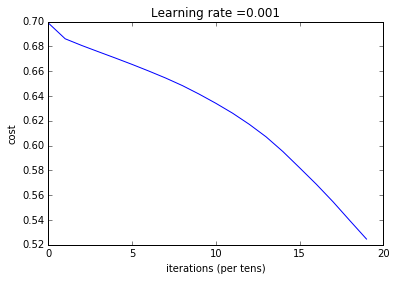

In [10]:
parameters = L_layer_model(train_x,train_y , layers_dims, num_iterations = 2000, print_cost = True)

In [11]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.8199999999999998


In [12]:
path, dirs, cat_files_test = next(os.walk("test_set/cats/"))
file_count_cat = len(cat_files_test)
print(file_count_cat)

path, dirs, dog_files_test = next(os.walk("test_set/dogs/"))
file_count_dog = len(dog_files_test)
print(file_count_dog)

1001
1001


In [17]:
n_cat_test = 50
n_dog_test = 50

#Variables
m_test = n_cat_test + n_dog_test               # Number of train ex.
print(m_test)
num_px = 64
y_test = np.zeros((1,m_test))
X_test = np.zeros((12288,m_test))
# Input Dataset from the folder

for i in range(4000,m_test+4000):
#     print(i%n_cat)
    if i<n_cat_test+4000:
        my_image = "cat."+str(i+1)+".jpg" # change this to the name of your image file 
        fname = "test_set/cats/" + my_image
        image = np.array(ndimage.imread(fname, flatten=False))
        my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
        y_test[0][i%4000] = 1 # the true class of your image (1 -> cat, 0 -> non-cat)
#         print(my_image)
        X_test[:,i%4000] = my_image[:,0]
#         print(X_train)
        
    else:
        my_image = "dog."+str(i+1-n_cat_test)+".jpg" # change this to the name of your image file 
        fname = "test_set/dogs/" + my_image
        image = np.array(ndimage.imread(fname, flatten=False))
        my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
        y_test[0][i%4000] = 0
        X_test[:,i%4000] = my_image[:,0]
    

#     fname = "test_set/cats/" + my_image
#     image = np.array(ndimage.imread(fname, flatten=False))
#     my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
    # my_predicted_image = %precisiondict(my_image, my_label_y, parameters)
# print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + 
#        classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

# print(train_y[1:10])

100


In [18]:
test_x = X_test
test_y = y_test 
pred_test = predict(test_x, test_y, parameters)


Accuracy: 0.5700000000000001
